In [2]:
# Hubungkan dengan google drive untuk mendapat data yang telah disimpan
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,expon,t,ttest_ind,norm
from statsmodels.stats.proportion import proportions_ztest

In [4]:
# Melihat informasi pada data
data = pd.read_csv('/content/drive/MyDrive/Pacmann (Analytics & Data Science)/Data/insurance.csv')
print(data.head(),'\n')
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# Analisa Descriptive Statistic

In [5]:
# Melakukan Analisa Statistika Deskriptif
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Perbandingan rata-rata umur dan nilai BMI dari perokok dan data 
print('1. Rata-rata umur pengguna pada data adalah', round(data['age'].mean()))
print('2. Rata-rata umur pengguna yang merokok adalah', round(data.age[data['smoker']=='yes'].mean()))
print('3. Rata-rata nilai BMI pengguna pada data adalah %.2f' %(data['bmi'].mean()))
print('4. Rata-rata nilai BMI pengguna yang merokok adalah %.2f'% data.bmi[data['smoker']=='yes'].mean())

1. Rata-rata umur pengguna pada data adalah 39
2. Rata-rata umur pengguna yang merokok adalah 39
3. Rata-rata nilai BMI pengguna pada data adalah 30.66
4. Rata-rata nilai BMI pengguna yang merokok adalah 30.71


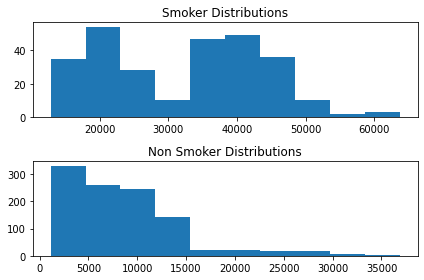

In [7]:
# Melihat distribusi data dari perokok dan non perokok
plt.subplot(211)
plt.title('Smoker Distributions')
plt.hist(data.charges[data['smoker']=='yes'])
plt.subplot(212)
plt.title('Non Smoker Distributions')
plt.hist(data.charges[data['smoker']=='no'])
plt.tight_layout()

plt.show()

In [8]:
# Perbandingan varians perokok dan non perokok
print('Varians charges dari perokok', np.square(data.charges[data['smoker']=='yes'].std()))
print('Varians charges dari non perokok', np.square(data.charges[data['smoker']=='no'].std()))
print(data.charges[data['smoker']=='yes'].std())
print(data.charges[data['smoker']=='no'].std())

Varians charges dari perokok 133207311.20634922
Varians charges dari non perokok 35925420.496111736
11541.547175589121
5993.7818191949345


In [9]:
# Perbandingan rata-rata umur perempuan dan laki-laki yang merokok
smoker = data[data['smoker']=='yes']
print('Rata-rata umur perokok perempuan', round(smoker.age[smoker['sex']=='female'].mean()))
print('Rata-rata umur perokok laki-laki', round(smoker.age[smoker['sex']=='male'].mean()))

Rata-rata umur perokok perempuan 39
Rata-rata umur perokok laki-laki 38


In [10]:
# Perbedaan rata-rata tagihan kesehatan perokok dan non perokok
print('Rata-rata tagihan kesehatan perokok', data.charges[data['smoker']=='yes'].mean())
print('Rata-rata tagihan kesehatan non perokok', data.charges[data['smoker']=='no'].mean())

Rata-rata tagihan kesehatan perokok 32050.23183153284
Rata-rata tagihan kesehatan non perokok 8434.268297856204


In [11]:
# Perbandingan rata-rata tagihan kesehatan perokok dan non perokok dengan BMI diatas 25
bmi25 = data[data['bmi']>25]
print('Rata-rata tagihan kesehatan perokok dengan BMI diatas 25:', bmi25.charges[bmi25['smoker']=='yes'].mean())
print('Rata-rata tagihan kesehatan non perokok dengan BMI diatas 25:', bmi25.charges[bmi25['smoker']=='no'].mean())

Rata-rata tagihan kesehatan perokok dengan BMI diatas 25: 35116.90965694064
Rata-rata tagihan kesehatan non perokok dengan BMI diatas 25: 8629.589609712157


In [12]:
# Perbandingan BMI berdasarkan jenis kelamin
print('Rata-rata BMI perempuan %.2f'% data.bmi[data['sex']=='female'].mean())
print('Rata-rata BMI laki-laki %.2f'% data.bmi[data['sex']=='male'].mean())
# Perbandingan BMI berdasarkan smoker dan non smoker
print('\nRata-rata BMI perokok %.2f'% data.bmi[data['smoker']=='yes'].mean())
print('Rata-rata BMI non perokok %.2f'% data.bmi[data['smoker']=='no'].mean())

Rata-rata BMI perempuan 30.38
Rata-rata BMI laki-laki 30.94

Rata-rata BMI perokok 30.71
Rata-rata BMI non perokok 30.65


# Analisa Variabel Kategorik (PMF)

In [49]:
# Perbandingan peluang besaran tagihan antara perempuan dan laki-laki
total_charges = data.charges.sum()
CP_perempuan = data.charges[data['sex']=='female'].sum()/total_charges
CP_lakilaki = data.charges[data['sex']=='male'].sum()/total_charges
print('Peluang tagihan perempuan adalah %.2f'%CP_perempuan)
print('Peluang tagihan laki-laki adalah %.2f'%CP_lakilaki)

Peluang tagihan perempuan adalah 0.47
Peluang tagihan laki-laki adalah 0.53


In [14]:
# Melihat region yang ada pada data
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [68]:
# Proporsi tagihan dari setiap region
CP_southwest = data.charges[data['region']=='southwest'].sum()/total_charges
CP_southeast = data.charges[data['region']=='southeast'].sum()/total_charges
CP_northwest = data.charges[data['region']=='northwest'].sum()/total_charges
CP_northeast = data.charges[data['region']=='northeast'].sum()/total_charges
print(f'Proporsi tagihan region southwest adalah %.3f'%CP_southwest)
print(f'Proporsi tagihan region southeast adalah %.3f'%CP_southeast)
print(f'Proporsi tagihan region northwest adalah %.3f'%CP_northwest)
print(f'Proporsi tagihan region northeast adalah %.3f'%CP_northeast)

Proporsi tagihan region southwest adalah 0.226
Proporsi tagihan region southeast adalah 0.302
Proporsi tagihan region northwest adalah 0.227
Proporsi tagihan region northeast adalah 0.245


Proporsi jumlah orang di region southwest adalah 0.243
Proporsi jumlah orang di region southeast adalah 0.272
Proporsi jumlah orang di northwest adalah 0.243
Proporsi jumlah orang di northeast adalah 0.242



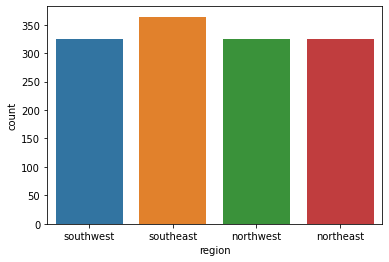

In [69]:
# Proporsi jumlah orang di tiap region
count_region = data['region'].count()
sns.countplot(x = data['region'])
C_southwest = data.region[data['region']=='southwest'].count()/count_region 
C_southeast = data.region[data['region']=='southeast'].count()/count_region 
C_northwest = data.region[data['region']=='northwest'].count()/count_region 
C_northeast = data.region[data['region']=='northeast'].count()/count_region 
print('Proporsi jumlah orang di region southwest adalah %.3f' %C_southwest)
print('Proporsi jumlah orang di region southeast adalah %.3f' %C_southeast)
print('Proporsi jumlah orang di northwest adalah %.3f' %C_northwest)
print('Proporsi jumlah orang di northeast adalah %.3f\n' %C_northeast)

Proporsi jumlah perokok adalah 0.20
Proporsi jumlah bukan perokok adalah 0.80



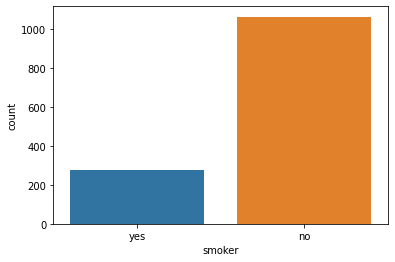

In [62]:
# Proporsi perokok dan bukan perokok
sum_perokok = data['smoker'].count()
sns.countplot(x = data['smoker'])
smoker = data.smoker[data['smoker']=='yes'].count()/sum_perokok 
non_smoker = data.smoker[data['smoker']=='no'].count()/sum_perokok 
print(f'Proporsi jumlah perokok adalah %.2f'%smoker)
print(f'Proporsi jumlah bukan perokok adalah %.2f\n'%non_smoker)

In [65]:
# Peluang Perokok Perempuan 
data_pr = data[data['sex']=='female']
count_pr = data_pr['smoker'].count()
smoker_pr = data_pr.smoker[data_pr['smoker']=='yes'].count()/count_pr

# Peluang Perokok Laki-Laki
data_lk = data[data['sex']=='male']
count_lk = data_lk['smoker'].count()
smoker_lk = data_lk.smoker[data_lk['smoker']=='yes'].count()/count_lk

print(f'Peluang perokok perempuan adalah %.2f'%smoker_pr)
print(f'Peluang perokok laki-laki adalah %.2f\n'%smoker_lk)

Peluang perokok perempuan adalah 0.17
Peluang perokok laki-laki adalah 0.24



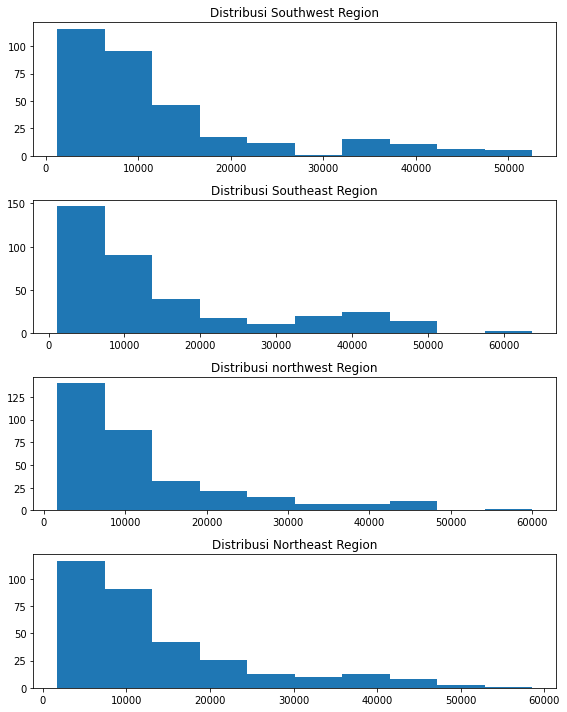

In [67]:
# Melihat distribusi data tagihan dari tiap region
plt.figure(figsize=(8,10))
plt.subplot(411)
plt.title('Distribusi Southwest Region')
plt.hist(data.charges[data['region']=='southwest'])
plt.subplot(412)
plt.title('Distribusi Southeast Region')
plt.hist(data.charges[data['region']=='southeast'])
plt.subplot(413)
plt.title('Distribusi northwest Region')
plt.hist(data.charges[data['region']=='northwest'])
plt.subplot(414)
plt.title('Distribusi Northeast Region')
plt.hist(data.charges[data['region']=='northeast'])
plt.tight_layout()

# Analisa Variabel Kontinu

In [20]:
# Mencari peluang besar tagihan berdasarkan BMI
condition = (data['bmi']>=data['bmi'].min()) & (data['bmi']<=data['bmi'].max())
charges_given_bmi = data[condition]['charges']

for i in range(1,16700,1000):
  x = i
  mean = charges_given_bmi.mean()
  std = charges_given_bmi.std()
  P = 1 - norm.cdf(x, mean, std)
  print(f'Peluang x>{x}: {P}')

Peluang x>1: 0.8634036876149656
Peluang x>1001: 0.8445089818935315
Peluang x>2001: 0.8239664483466611
Peluang x>3001: 0.8017840667579076
Peluang x>4001: 0.7779936180375865
Peluang x>5001: 0.7526518220841484
Peluang x>6001: 0.7258408573920315
Peluang x>7001: 0.6976682017746053
Peluang x>8001: 0.6682657580725906
Peluang x>9001: 0.63778825648375
Peluang x>10001: 0.6064109548249096
Peluang x>11001: 0.574326688076487
Peluang x>12001: 0.5417423473214487
Peluang x>13001: 0.5088748940473684
Peluang x>14001: 0.4759470372300234
Peluang x>15001: 0.44318271638973095
Peluang x>16001: 0.4108025429610572


Peluang: 0.9573559499024568


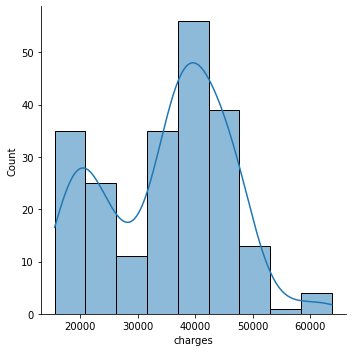

In [21]:
# Mengetahui peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.
condition = (data['bmi']>25) & (data['smoker']=='yes')
charges_given_bmi = data[condition]['charges']
sns.displot(charges_given_bmi,kde=True);

x = 16700
mean = charges_given_bmi.mean()
std = charges_given_bmi.std()
P = 1 - norm.cdf(x, mean, std)
print('Peluang:',P)

Peluang: 0.9082404944909882


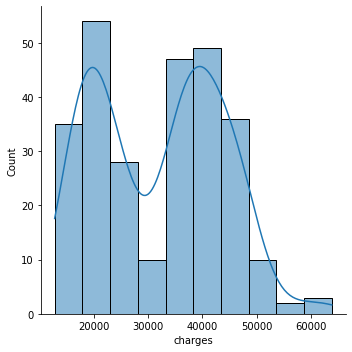

In [22]:
# Mengetahui peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok
condition = (data['smoker']=='yes')
charges_given_bmi = data[condition]['charges']
sns.displot(charges_given_bmi,kde=True);

x = 16700
mean = charges_given_bmi.mean()
std = charges_given_bmi.std()
P = 1 - norm.cdf(x, mean, std)
print('Peluang:',P)

In [23]:
# Mengetahui perbandingan peluang seseorang dengan BMI diatas dan dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
condition1 = (data['bmi']>25)
charges_given_bmi1 = data[condition1]['charges']

condition2 = (data['bmi']<25)
charges_given_bmi2 = data[condition2]['charges']

x = 16700
mean1 = charges_given_bmi1.mean()
std1 = charges_given_bmi1.std()
mean2 = charges_given_bmi2.mean()
std2 = charges_given_bmi2.std()
P1 = 1 - norm.cdf(x, mean1, std1)
P2 = 1 - norm.cdf(x, mean2, std2)
print('Peluang seseorang memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:',P1)
print('Peluang seseorang memiliki BMI dibawah 25 mendapat tagihan kesehatan diatas 16.7k:',P2)

Peluang seseorang memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k: 0.41506414463777574
Peluang seseorang memiliki BMI dibawah 25 mendapat tagihan kesehatan diatas 16.7k: 0.19672639383141954


In [24]:
# Mengetahui perbandingan seseorang perokok dan non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
condition1 = (data['bmi']>25) & (data['smoker']=='yes')
charges_given_bmi1 = data[condition1]['charges']

condition2 = (data['bmi']>25) & (data['smoker']=='no')
charges_given_bmi2 = data[condition2]['charges']

x = 16700
mean1 = charges_given_bmi1.mean()
std1 = charges_given_bmi1.std()
mean2 = charges_given_bmi2.mean()
std2 = charges_given_bmi2.std()
P1 = 1 - norm.cdf(x, mean1, std1)
P2 = 1 - norm.cdf(x, mean2, std2)
print('Peluang seseorang perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:',P1)
print('Peluang seseorang non perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:',P2)

Peluang seseorang perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k: 0.9573559499024568
Peluang seseorang non perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k: 0.09076840690505383


# Analisa Korelasi Variabel

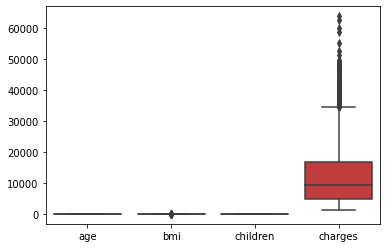

In [25]:
# Mengecek variance pada data
sns.boxplot(data= data[['age','bmi','children','charges']])

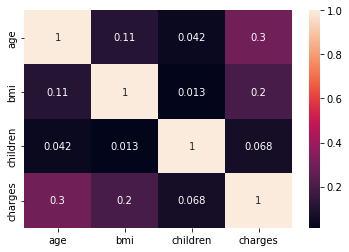

In [26]:
# Korelasi secara keseluruhan
sns.heatmap(data.corr(),annot=True);

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


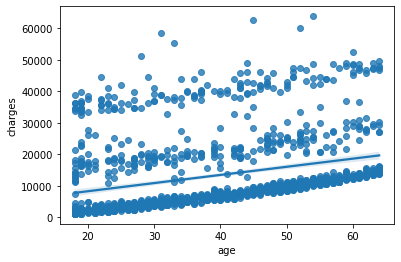

In [70]:
# Korelasi umur dan tagihan
sns.regplot(x='age',y='charges',data=data);
data[['age','charges']].corr()

*   Dari visualisasi diatas maka dapat kita simpulkan bahwa nilai korelasi 0.29 menunjukan adanya korelasi positif antara Umur dan Tagihan 
*   Korelasi positif yang dimiliki berdekatan dengan nilai 0 menunjukan hubungan searah antara Umur dan Tagihan dinilai lemah

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


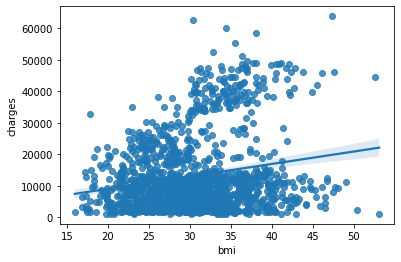

In [71]:
# Korelasi bmi dan tagihan
sns.regplot(x='bmi',y='charges',data=data);
data[['bmi','charges']].corr()

*   Dari visualisasi diatas maka dapat kita simpulkan bahwa nilai korelasi 0.19 menunjukan adanya korelasi positif antara BMI dan Tagihan 
*   Korelasi positif yang berdekatan dengan nilai 0 menunjukan hubungan searah antara BMI dan Tagihan dinilai Sangat lemah bahkan hampir tidak berkorelasi

,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


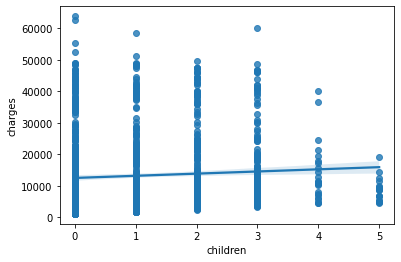

In [72]:
# Korelasi banyak anak dan tagihan
sns.regplot(x='children',y='charges',data=data);
data[['children','charges']].corr()

*   Dari visualisasi diatas maka dapat kita simpulkan bahwa nilai korelasi 0.06 menunjukan tidak adanya korelasi yang signifikan antara Anak dan Tagihan 
*   Nilai korelasi yang mendekati 0 juga menunjukan tidak adanya hubungan searah antara Anak dan Tagihan 

# Pengujian Hipotesis

In [30]:
#menghitung error yang akan dihasilkan untuk setiap ukuran sampel
#inisialisasi list kosong terlebih dahulu
error = []
for i in range(1,len(data)):
    #menghitung mean populasi
    mean_populasi = data.charges.mean()
    #menghitung mean sample dengan jumlah sampel 1 hingga jumlah sampel=jumlah populasi 
    mean_sampel = data.charges.sample(n=i).mean()
    #menghitung error dari mean sample
    rel_error = 100* abs(mean_populasi-mean_sampel)/mean_populasi
    error.append(rel_error)

In [31]:
# list of int
ukuran_sampel = list(range(1,1700))

# Calling DataFrame constructor after zipping
# both lists, with columns specified
errors = pd.DataFrame(list(zip(ukuran_sampel, error)),
               columns =['sample_size', 'relative_error'])
#menampilkan tabel errorrs
errors

,sample_size,relative_error
0,1,25.525150
1,2,6.966799
2,3,28.952679
3,4,11.750787
4,5,64.373927
...,...,...
1332,1333,0.170146
1333,1334,0.105198
1334,1335,0.087361
1335,1336,0.009132


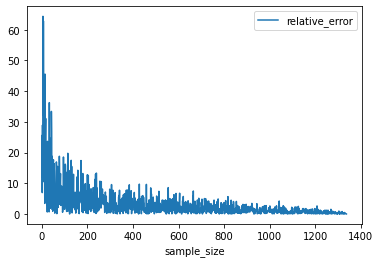

In [32]:
#Mencoba untuk menvisualisasikan hubungan antara relative error vs ukuran sampel
errors.plot(x='sample_size',y='relative_error',kind='line')
plt.show()

## Kasus 1: Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [33]:
# Mengambil sampel dari populasi perokok dan non perokok sebanyak 30 sampel
s_data1 = data.charges[data['smoker']=='yes'].sample(n=30,random_state=123) 
s_data2 = data.charges[data['smoker']=='no'].sample(n=30,random_state=123)

print('Jumlah sampel perokok',s_data1.count()) 
print('Jumlah sampel non perokok',s_data2.count())

Jumlah sampel perokok 30
Jumlah sampel non perokok 30


### 1. Hipothesis dan Significance Level
$$H_0: \mu_1 ≤ \mu_2$$
$$H_1: \mu_1 > \mu_2$$

In [34]:
# Nilai Significance Level
alpha = 0.05

### 2. Tentukan Statistik Uji
Statistik yang diuji terkait rata rata, namun karena kita tidak mengetahui standar deviasi populasi dari sampel yang kecil, maka kita akan gunakan t-test pada 2 sampel, karena kita punya sampel perokok dan sampel non perokok yang diujikan

### 3. Aturan Keputusan


In [35]:
# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.05 dan degree of freedom 29 (df = n-1)
t_crit = -t.ppf(alpha,df=29)
print('Critical Value:%.2f'%(t_crit))

Critical Value:1.70


* Daerah Penolakan ada di sebelah kanan, dengan nilai kritis 1.70 
* Ada 2 cara pengambilan keputusan
  * jika kita mendapatkan nilai p-value kurang dari alpha, maka kita tolak $H_0$
  * jika kita mendapatkan statistik uji lebih dari nilai kritis 1.70, maka kita tolak $H_0$

### 4. Hitung Statistik Uji

In [36]:
stat, p = ttest_ind(a = s_data1, b = s_data2, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.13f' % (stat, p)) 

Statistics = 9.1843, p-value = 0.0000000000075


### 5. Pengambilan Keputusan

In [37]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


Maka dapat kita simpulkan bahwa Tagihan Perokok lebih besar dari Tagihan Non Perokok. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa Tagihan Perokok diatas rata rata Tagihan Non Perokok. 

## Kasus 2: Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [38]:
# Mengambil sampel dari populasi BMI diatas 25 dan BMI dibawah 25 sebanyak 30 sampel
s_bmi1 = data.charges[data['bmi']>25].sample(n=30,random_state=123) 
s_bmi2 = data.charges[data['bmi']<25].sample(n=30,random_state=123)

print('Jumlah sampel bmi diatas 25:',s_bmi1.count()) 
print('Jumlah sampel bmi dibawah 25:',s_bmi2.count())

Jumlah sampel bmi diatas 25: 30
Jumlah sampel bmi dibawah 25: 30


### 1. Hipothesis dan Significance Level
$$H_0: \mu_1 ≤ \mu_2$$
$$H_1: \mu_1 > \mu_2$$

In [39]:
alpha = 0.05

### 2. Aturan Keputusan

In [40]:
# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.05 dan degree of freedom 29 (df = n-1)
t_crit = -t.ppf(alpha,df=29)
print('Critical Value:%.2f'%(t_crit))

Critical Value:1.70


### 3. Hitung Uji Hipothesis

In [41]:
stat, p = ttest_ind(a = s_bmi1, b = s_bmi2, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 1.1712, p-value = 0.1234


### 4. Pengambilan Keputusan

In [42]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Tagihan Kesehatan BMI diatas 25 lebih kecil dari Tagihan Kesehatan BMI dibawah 25. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa Tagihan Kesehatan BMI yang lebih dari 25 berada dibawah rata rata Tagihan Kesehatan BMI yang kurang dari 25. 

## Kasus 3: BMI Laki-Laki dan Perempuan Sama

### Hipothesis
$$ H_0: 𝝁_0 = 𝝁_1$$
$$ H_0: 𝝁_0 \not= 𝝁_1$$


In [43]:
# Data
s_lk = data.bmi[data['sex']=='male'].sample(n=30,random_state=123)
s_pr = data.bmi[data['sex']=='female'].sample(n=30,random_state=123)
print('Jumlah sampel bmi laki-laki:',s_lk.count()) 
print('Jumlah sampel bmi perempuan:',s_pr.count())

# Significance level
alpha = 0.05

# Aturan keputusan
t_crit = -t.ppf(alpha/2,df=29)
print('\nCritical Value:%.2f'%(t_crit))

# Hitung uji hipothesis
stat, p = ttest_ind(a = s_lk, b = s_pr, equal_var=False, alternative='two-sided') # eaual_var= False karena varians kedua populasi berbeda
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Jumlah sampel bmi laki-laki: 30
Jumlah sampel bmi perempuan: 30

Critical Value:2.05
Statistics = -0.5570, p-value = 0.5797
Two group means are equal (Gagal tolak H0)


### Kesimpulan

Maka dapat kita simpulkan bahwa BMI Laki-Laki sama besar dengan BMI Perempuan. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa rata-rata BMI Laki-Laki sama dengan BMI Perempuan.

## Kasus 4: Tagihan kesehatan laki-laki lebih besar dari perempuan

### Hipothesis 
$$H_0: \mu_1 ≤ \mu_2$$
$$H_1: \mu_1 > \mu_2$$

In [44]:
# Data
s_clk = data.charges[data['sex']=='male'].sample(n=30,random_state=123)
s_cpr = data.charges[data['sex']=='female'].sample(n=30,random_state=123)
print('Jumlah sampel bmi laki-laki:',s_clk.count()) 
print('Jumlah sampel bmi perempuan:',s_cpr.count())

# Significance level
alpha = 0.05

# Aturan keputusan
t_crit = -t.ppf(alpha,df=29)
print('\nCritical Value:%.2f'%(t_crit))

# Hitung uji hipothesis
stat, p = ttest_ind(a = s_clk, b = s_cpr, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Jumlah sampel bmi laki-laki: 30
Jumlah sampel bmi perempuan: 30

Critical Value:1.70
Statistics = -0.7510, p-value = 0.7721
Two group means are equal (Gagal tolak H0)


### Kesimpulan
Maka dapat kita simpulkan bahwa Tagihan Kesehatan Laki-Laki lebih kecil dari Tagihan Kesehatan Perempuan. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa Tagihan Kesehatan Laki-Laki berada dibawah rata rata Tagihan Kesehatan Perempuan. 

## Kasus 5: Proporsi Perokok Berbeda di Tiap Region

### Hipothesis
$$H_0 : p_1 = p_2 = p_3 = p_4$$
$$H_a : p_1 \not= p_2 \not= p_3 \not= p_4$$

### Statistik Uji

In [45]:
# Total data per wilayah
r_sw = data.region[data['region']=='southwest'].count()
r_se = data.region[data['region']=='southeast'].count()
r_nw = data.region[data['region']=='northwest'].count()
r_ne = data.region[data['region']=='northeast'].count()

# Data perokok
smoker = data[data['smoker']=='yes']

# Data perokok per wilayah
s_sw = smoker.region[smoker['region']=='southwest'].count()
s_se = smoker.region[smoker['region']=='southeast'].count()
s_nw = smoker.region[smoker['region']=='northwest'].count()
s_ne = smoker.region[smoker['region']=='northeast'].count()

# Pembagian proporsi
sampel_swse = [s_sw,s_se]
total_swse = [r_sw,r_se] 
sampel_swnw = [s_sw,s_nw]
total_swnw = [r_sw,r_nw]
sampel_swne = [s_sw,s_ne]
total_swne = [r_sw,r_ne]

### Uji Statistik 

In [46]:
# Buat fungsi untuk menghitung uji statistik dan p_value
def uji_statistik(x,y):
  (test_stat, p_value) = proportions_ztest(x, y,alternative='two-sided')
  print("The computed Z test statistic: ",test_stat)
  print("The p-value: ", p_value)

  # Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.05
  z_crit=norm.ppf(1-0.05/2)
  print('Critical Value:',z_crit)

  # Menentukan aturan keputusan
  if p_value<0.05:
    print("Tolak null hypothesis")
  else:
    print("Gagal tolak null hypothesis")

In [47]:
# Uji Southwest dan Southeast
print('Uji Southwest dan Southeast')
uji_statistik(sampel_swse,total_swse)

# Uji Southwest dan Northwest
print('\nUji Southwest dan Northwest')
uji_statistik(sampel_swnw,total_swnw)

# Uji Southwest dan Northeast
print('\nUji Southwest dan Northeast')
uji_statistik(sampel_swne,total_swne)

Uji Southwest dan Southeast
The computed Z test statistic:  -2.2769398888136454
The p-value:  0.022789815463035743
Critical Value: 1.959963984540054
Tolak null hypothesis

Uji Southwest dan Northwest
The computed Z test statistic:  0.0
The p-value:  1.0
Critical Value: 1.959963984540054
Gagal tolak null hypothesis

Uji Southwest dan Northeast
The computed Z test statistic:  -0.9150414474198534
The p-value:  0.3601698716632562
Critical Value: 1.959963984540054
Gagal tolak null hypothesis


### Kesimpulan 
Hasil aturan keputusan secara keseluruhan menyatakan bahwa kita tolak hypothesis awal namun juga menyatakan kita gagal tolak hypothesis awal. Maka dapat disimpulkan bahwa belum ada cukup bukti yang menyatakan proporsi region berbeda atau sama satu sama lainnya. 

Dari hasil pengujian hypothesis kita mendapatkan informasi bahwa proporsi ketiga region selain southeast memiliki proporsi yang sama. Sedangkan region southeast sendiri memiliki proporsi yang berbeda dengan region lainnya.